# Visualisations for Thesis

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create uniform colour palette
palette ={"NEU": "#b2b2b2", "NEG": "#ff8f8f", "POS": "#00FF00"}
# set uniform figure size
sns.set(rc={'figure.figsize':(10,6.5)})
# set seaborne style
sns.set_style('whitegrid')

In [3]:
# load data
df = pd.read_csv("dataset_token_ready.csv")
df['month'] = pd.DatetimeIndex(df['date']).month

with open("dataset_sentiment.pkl", "rb") as f:
    dfa = pickle.load(f)
    
# drop Radio 800
dfa = dfa.loc[dfa["page"] != "Radio 800"]

# keep only data from 2017
dfa = dfa.loc[dfa["year"] > 2016]

# transform date to datetime format
dfa['date'] = pd.to_datetime(dfa['date'], errors='coerce')
    
    



In [4]:
repl_dict = {
    "Canal10":"Canal10",
     'Canal4':"regime",
     'Radio la Primerisima':"regime",
     'Confidencial':"opposition",
     'Canal6':"regime",
     'Canal14':"Canal14",
     '100% Noticias':"opposition",
     'Canal13':"regime",
     'Canal2':"regime",
     'Radio Nicaragua':"regime",
     'Radio Corporacion':"Radio Corporacion"
}

# create categories
dfa["position"] = dfa["page"].replace(repl_dict)
df["position"] = df["page"].replace(repl_dict)

## Sentiment Visualisations

<AxesSubplot:xlabel='year', ylabel='proportion'>

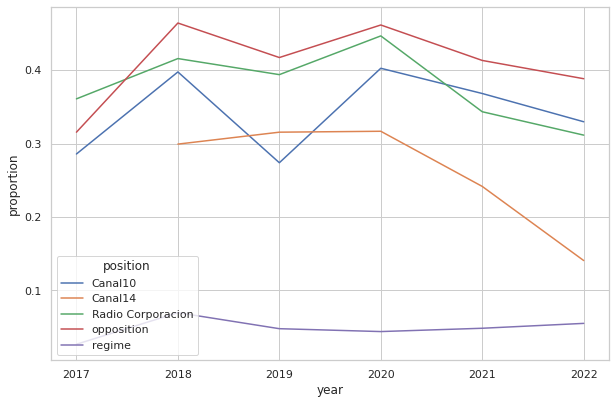

In [117]:
# create aggregated overview of sentiment per position and year
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

# all positions, but only negative with R corporacion as neutral
(df_agg
 .loc[(df_agg["sentiment"]=="NEG")]
 .pipe((sns.lineplot, "data"),
       x="year", y="proportion",
       hue="position"))

<AxesSubplot:xlabel='date', ylabel='proportion'>

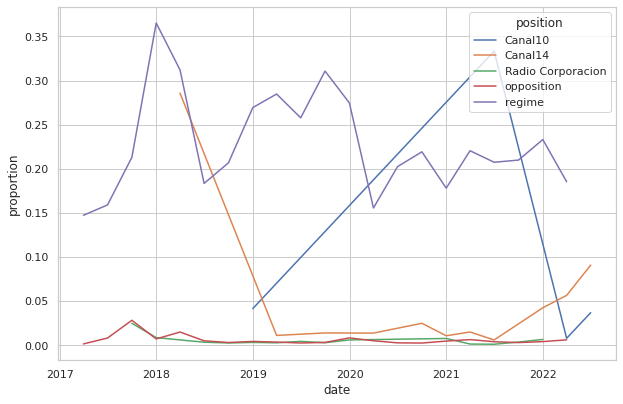

In [124]:
# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position",pd.Grouper(key='date', freq='Q')])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

# all positions, but only negative with R corporacion as neutral
(df_agg
 .loc[(df_agg["sentiment"]=="POS")]
 .pipe((sns.lineplot, "data"),
       x="date", y="proportion",
       hue="position"))

## Yearly Polarity and Independence Visualisation

<AxesSubplot:xlabel='year', ylabel='polarity'>

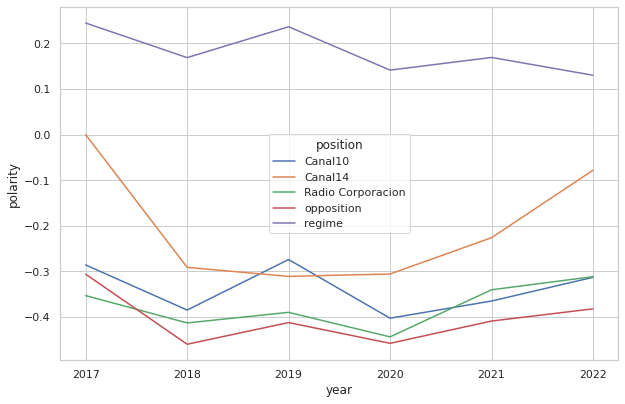

In [68]:
# create yearly polarity scores 

# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position", "year"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

df_agg.loc[df_agg["sentiment"] == "NEU", "polarity"] = 0
df_agg.loc[df_agg["sentiment"] == "POS", "polarity"] = df_agg["proportion"]
df_agg.loc[df_agg["sentiment"] == "NEG", "polarity"] = df_agg["proportion"]*(-1)

df_pol = df_agg.groupby(["position", "year"]).agg({"polarity":np.sum}).reset_index()

(df_pol
 .pipe((sns.lineplot, "data"),
       x="year", y="polarity",
       hue="position"))

<AxesSubplot:xlabel='year', ylabel='independence score'>

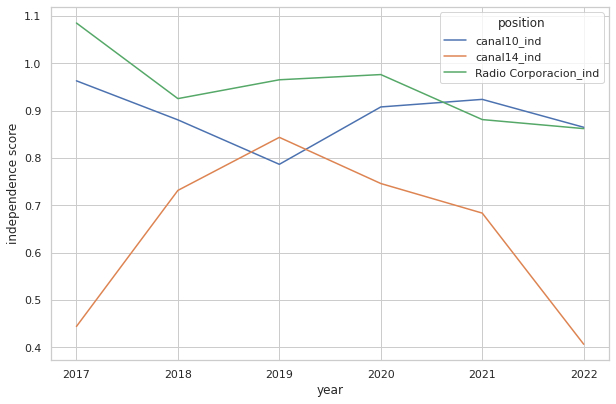

In [66]:
# create quarterly independence score visualisations

# create table to see how many mentions per outlet per year
df_can = pd.pivot(df_pol, index = "year", columns = "position", values = "polarity")

df_can["canal10_ind"] = (df_can["Canal10"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["canal14_ind"] = (df_can["Canal14"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["Radio Corporacion_ind"] = (df_can["Radio Corporacion"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])

# melt back to long format
df_ind = pd.melt(df_can.reset_index(), id_vars=['year'],
        value_vars=['canal10_ind', "canal14_ind", "Radio Corporacion_ind"],
       value_name = "independence score")

(df_ind
 .pipe((sns.lineplot, "data"),
       x="year", y="independence score",
       hue="position"))

## create polynomial viz

/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs)

/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/home/hennes/.local/lib/python3.8/site-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


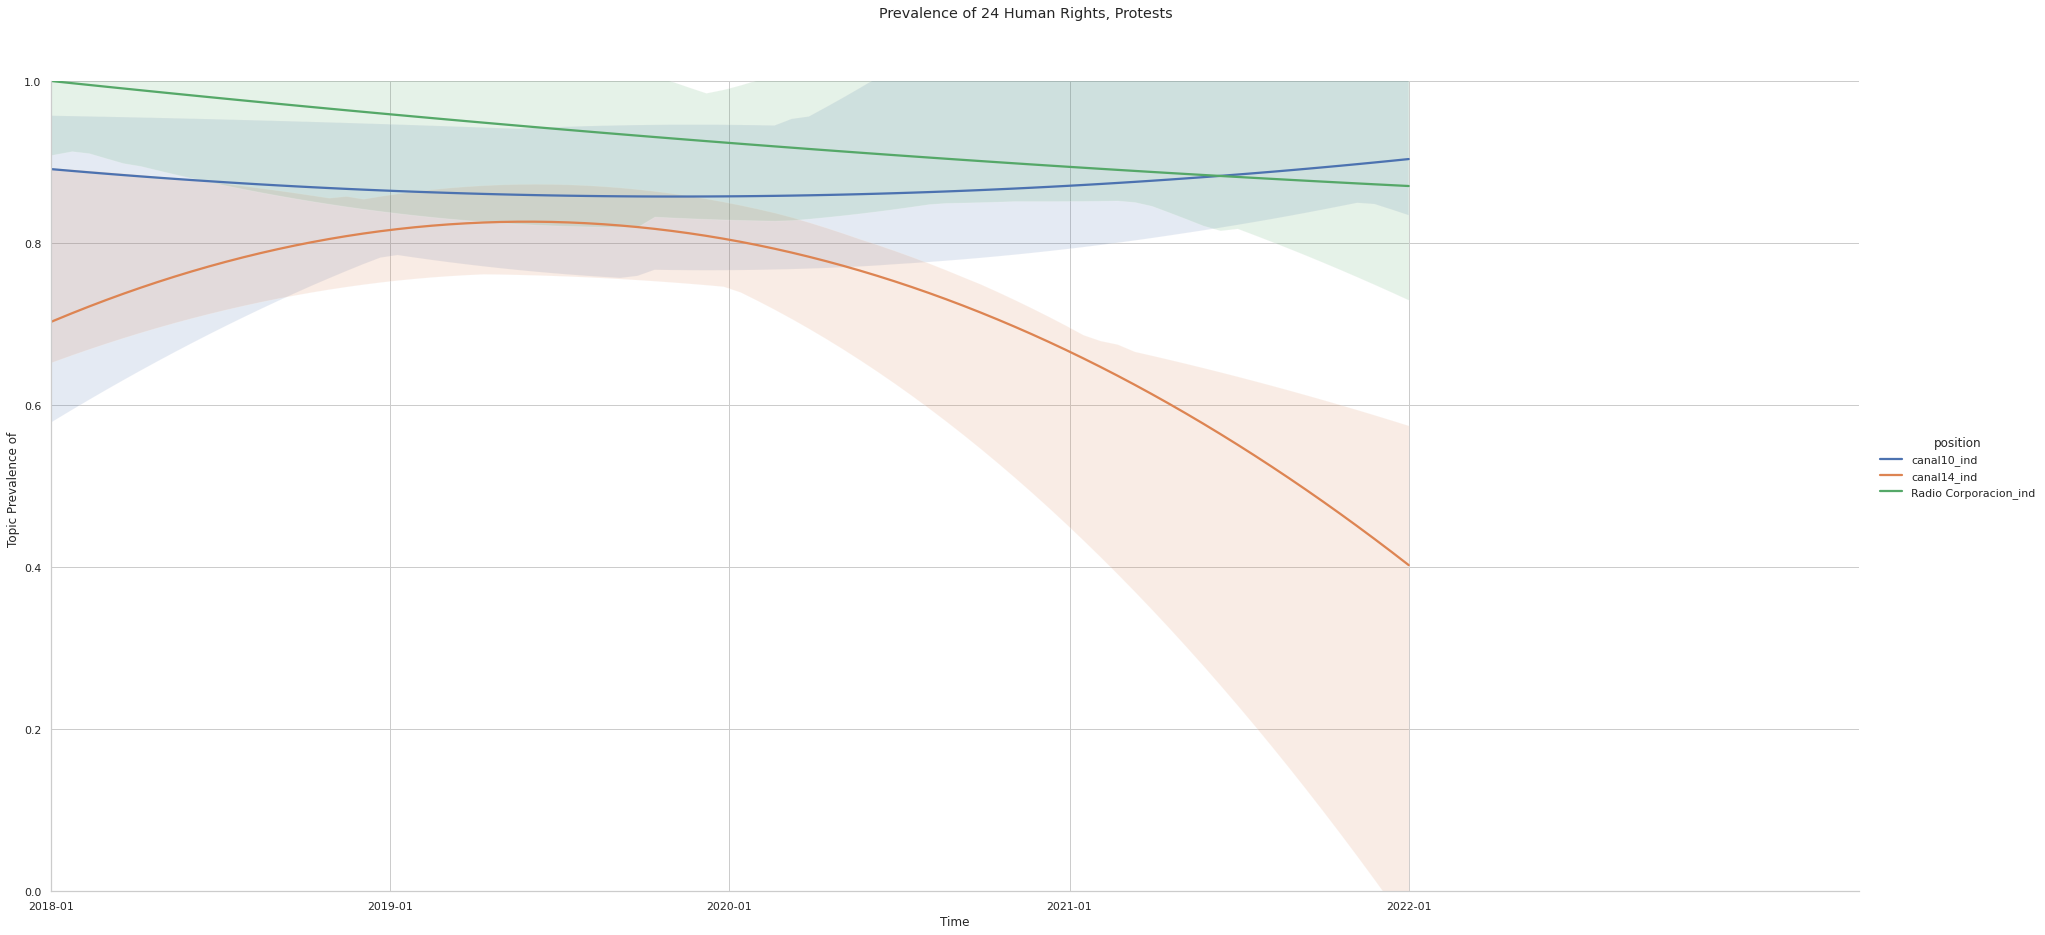

In [74]:
df_ind["date"] = pd.to_datetime(df_ind["year"], format = "%Y")

# create float representation of date

df_ind["days"] = df_ind["date"].apply(lambda x: (x.to_pydatetime() - datetime.datetime(2018,1,1)).days)

ticks = [0, 365, 730, 1096, 1461]
dates = [df_ind.loc[df_ind["days"] == x, "date"].min().to_pydatetime().strftime("%Y-%m") for x in ticks]

data = df_ind
figure = sns.lmplot(data = data, x= "days", order = 2,
           y= "independence score", hue = "position",
          scatter = False, height=13, aspect= 2)
# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1946)

for ax in figure.axes.flat:
    ax.set_xticks(ticks)
    ax.set_xticklabels(dates)
    
figure.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
figure.fig.suptitle('Prevalence of 24 Human Rights, Protests')
figure.set(xlabel = "Time", ylabel = f"Topic Prevalence of ")

plt.show()

## Quarterly Polarity and Independence Visualisation

<AxesSubplot:xlabel='date', ylabel='polarity'>

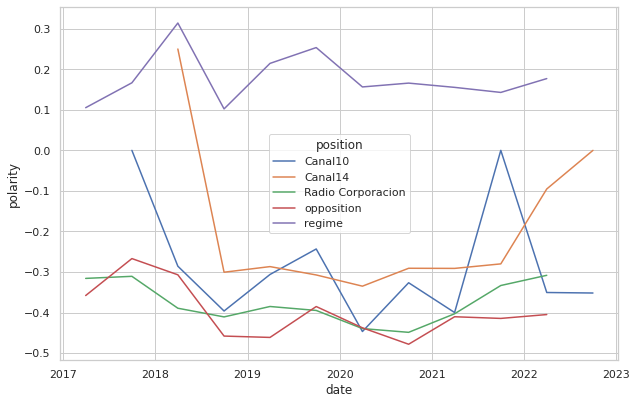

In [50]:
# create quarterly polarity scores 

# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position",pd.Grouper(key='date', freq='2Q')])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

df_agg.loc[df_agg["sentiment"] == "NEU", "polarity"] = 0
df_agg.loc[df_agg["sentiment"] == "POS", "polarity"] = df_agg["proportion"]
df_agg.loc[df_agg["sentiment"] == "NEG", "polarity"] = df_agg["proportion"]*(-1)

df_pol = df_agg.groupby(["position", "date"]).agg({"polarity":np.sum}).reset_index()

(df_pol
 .pipe((sns.lineplot, "data"),
       x="date", y="polarity",
       hue="position"))

<AxesSubplot:xlabel='date', ylabel='independence score'>

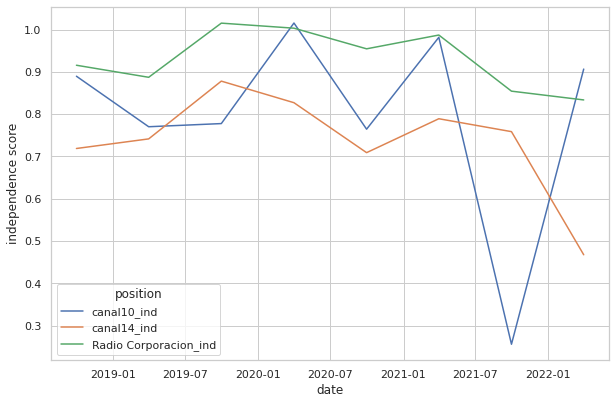

In [51]:
# create quarterly independence score visualisations

# create table to see how many mentions per outlet per year
df_can = pd.pivot(df_pol.loc[df_pol["date"] > '2018-03-31'], index = "date", columns = "position", values = "polarity")

df_can["canal10_ind"] = (df_can["Canal10"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["canal14_ind"] = (df_can["Canal14"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])
df_can["Radio Corporacion_ind"] = (df_can["Radio Corporacion"]-df_can["regime"])/(df_can["opposition"]-df_can["regime"])

# melt back to long format
df_ind = pd.melt(df_can.reset_index(), id_vars=['date'],
        value_vars=['canal10_ind', "canal14_ind", "Radio Corporacion_ind"],
       value_name = "independence score")

(df_ind
 .pipe((sns.lineplot, "data"),
       x="date", y="independence score",
       hue="position"))

## create polynomial regression viz

In [56]:
df_ind

,date,position,independence score,days
0,2018-09-30,canal10_ind,0.889649,0
1,2019-03-31,canal10_ind,0.770291,182
2,2019-09-30,canal10_ind,0.777755,365
3,2020-03-31,canal10_ind,1.015366,548
4,2020-09-30,canal10_ind,0.764518,731
5,2021-03-31,canal10_ind,0.981605,913
6,2021-09-30,canal10_ind,0.256369,1096
7,2022-03-31,canal10_ind,0.906530,1278
8,2022-09-30,canal10_ind,NaN,1461
9,2018-09-30,canal14_ind,0.718899,0


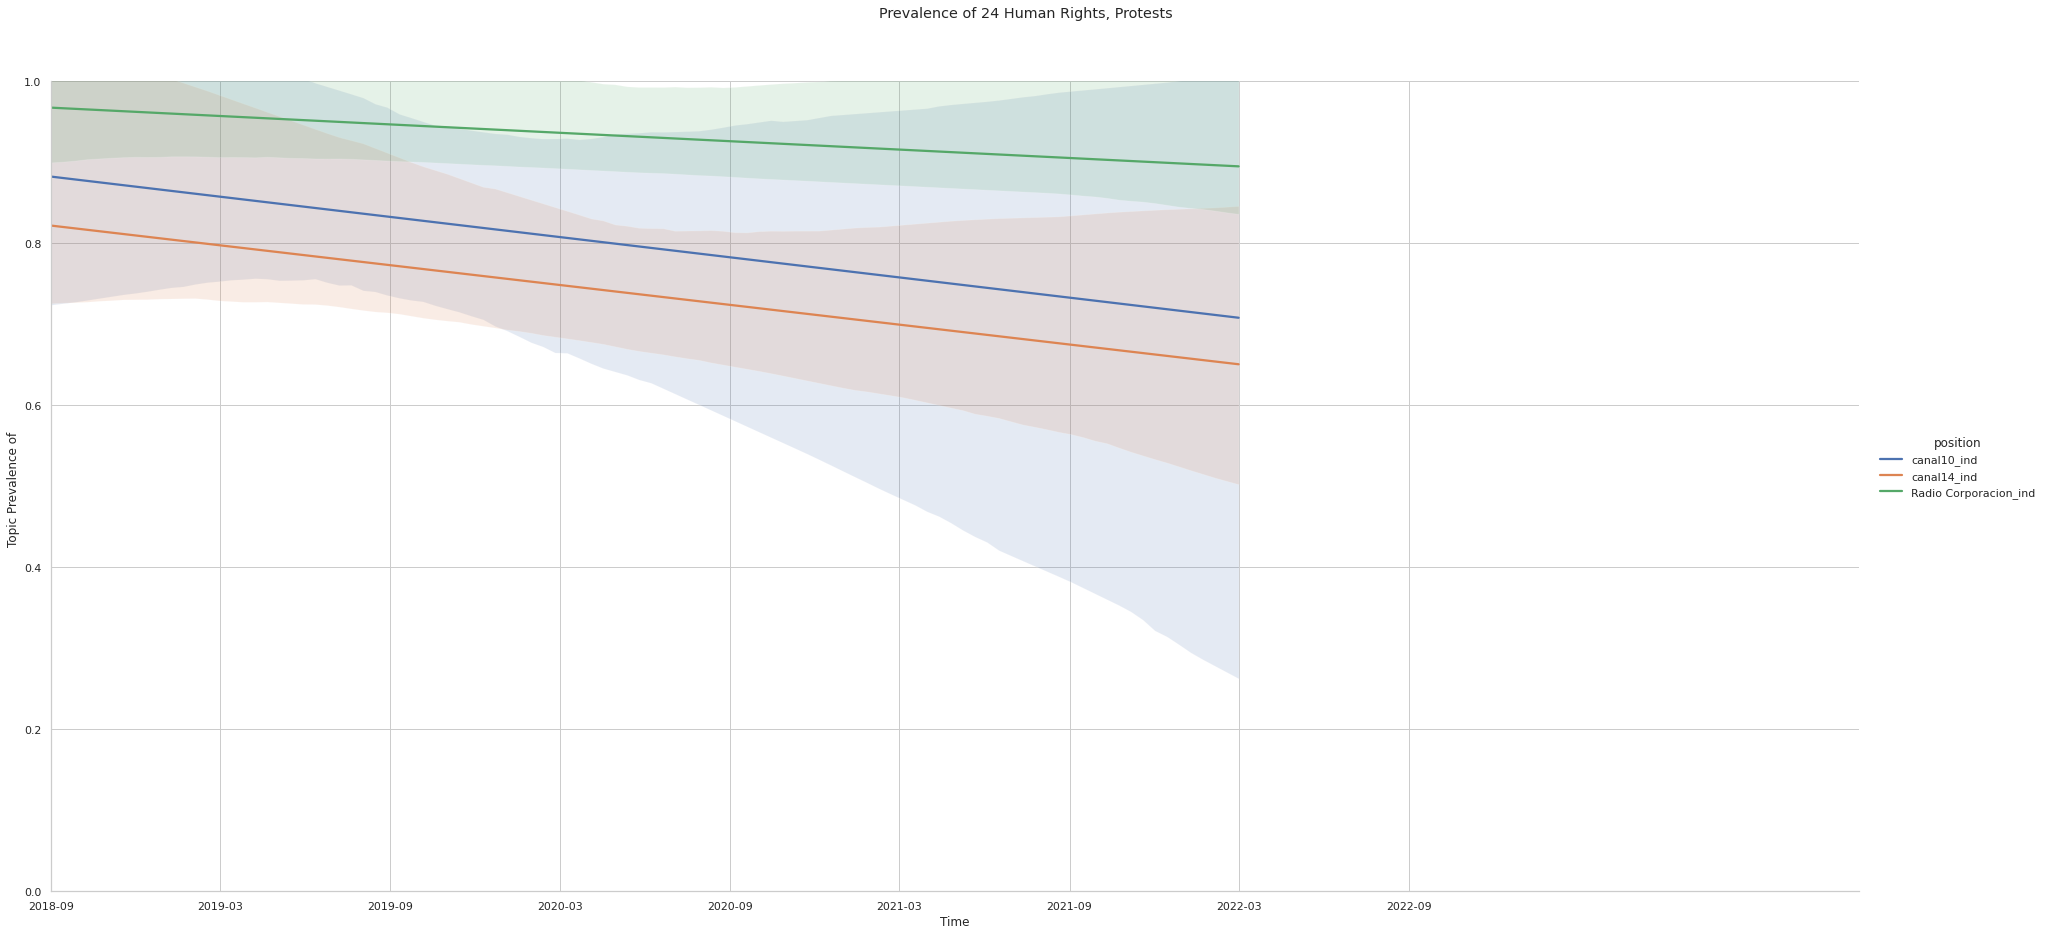

In [61]:
# create float representation of date

df_ind["days"] = df_ind["date"].apply(lambda x: (x.to_pydatetime() - datetime.datetime(2018,9,30)).days)

ticks = [0, 182, 365, 548, 731, 913, 1096, 1278, 1461]
dates = [df_ind.loc[df_ind["days"] == x, "date"].min().to_pydatetime().strftime("%Y-%m") for x in ticks]

data = df_ind
figure = sns.lmplot(data = data, x= "days", order = 1,
           y= "independence score", hue = "position",
          scatter = False, height=13, aspect= 2)
# control x and y limits
plt.ylim(0, 1)
plt.xlim(0, 1946)

for ax in figure.axes.flat:
    ax.set_xticks(ticks)
    ax.set_xticklabels(dates)
    
figure.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
figure.fig.suptitle('Prevalence of 24 Human Rights, Protests')
figure.set(xlabel = "Time", ylabel = f"Topic Prevalence of ")

plt.show()

## Monthly

In [18]:
dfa['year_month'] = dfa['date'].apply(lambda x: x.strftime('%Y-%m'))
dfa["year_month"] = pd.to_datetime(dfa["year_month"])

In [12]:
df_pol[df_pol["position"] == "Canal10"]

,position,year_month,polarity
0,Canal10,2017-07,0.000000
1,Canal10,2017-11,-0.400000
2,Canal10,2017-12,0.000000
3,Canal10,2018-01,0.000000
4,Canal10,2018-04,0.000000
5,Canal10,2018-05,-1.000000
6,Canal10,2018-06,-0.166667
7,Canal10,2018-07,-0.500000
8,Canal10,2018-08,-0.312500
9,Canal10,2018-09,-0.500000


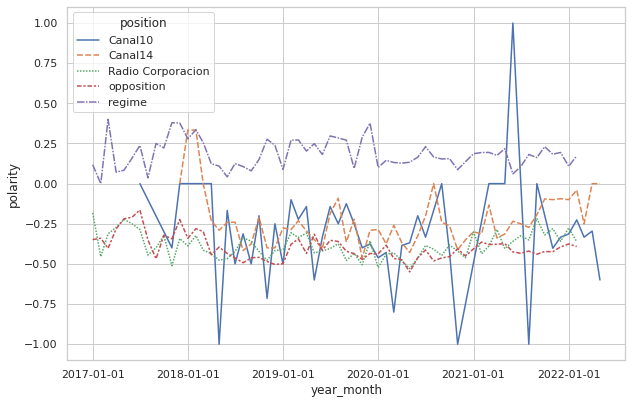

In [20]:
# create quarterly polarity scores 

# create aggregated overview of sentiment per position and year-quarter
df_agg = (dfa.groupby(["position","year_month"])["sentiment"]
 .value_counts(normalize=True)
 .rename("proportion")
 .reset_index())

df_agg.loc[df_agg["sentiment"] == "NEU", "polarity"] = 0
df_agg.loc[df_agg["sentiment"] == "POS", "polarity"] = df_agg["proportion"]
df_agg.loc[df_agg["sentiment"] == "NEG", "polarity"] = df_agg["proportion"]*(-1)

df_pol = df_agg.groupby(["position", "year_month"]).agg({"polarity":np.sum}).reset_index()

ax = sns.lineplot(data = df_pol, x="year_month", y="polarity", style="position", hue="position")
ax.set_xticks(["2017-01", "2018-01", "2019-01", "2020-01", "2021-01", "2022-01"])